C:\Users\marco\AppData\Local\Temp\ipykernel_22512\755986338.py:20: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic["Age"].fillna(titanic["Age"].median(), inplace=True)
C:\Users\marco\AppData\Local\Temp\ipykernel_22512\755986338.py:21: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a co

===== AdaBoost =====
Accuracy: 0.8060


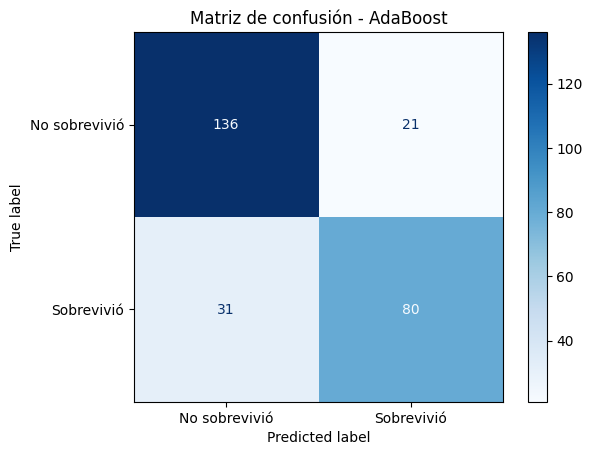

===== GradientBoosting =====
Accuracy: 0.7985


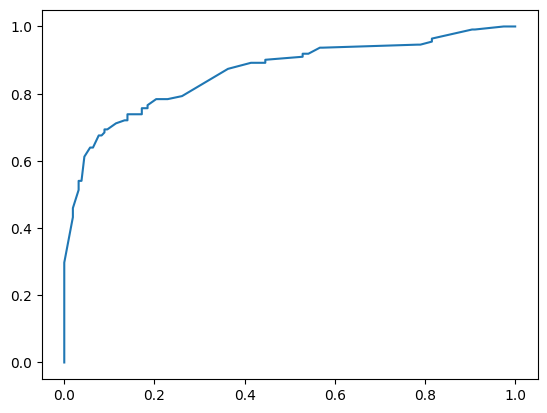

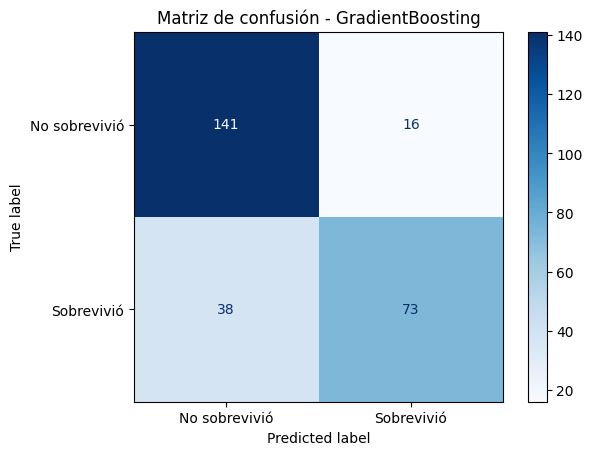

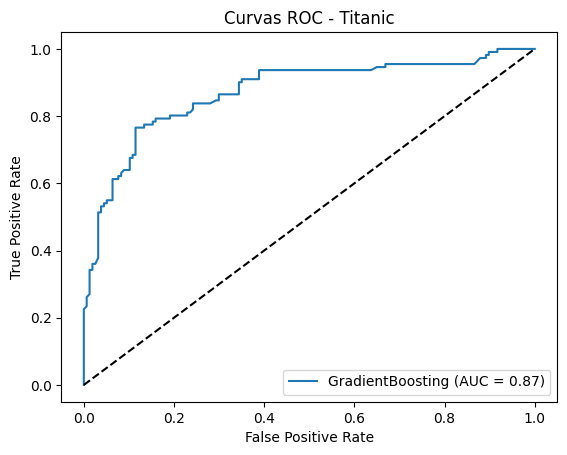

Resultados de Accuracy:
AdaBoost: 0.8060
GradientBoosting: 0.7985


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc

from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier

# ==========================
# Cargar dataset Titanic
# ==========================
titanic = pd.read_csv("https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv")

# Selección de features simples
titanic = titanic[["Pclass", "Sex", "Age", "SibSp", "Parch", "Fare", "Embarked", "Survived"]]

# Manejar valores nulos
titanic["Age"].fillna(titanic["Age"].median(), inplace=True)
titanic["Embarked"].fillna(titanic["Embarked"].mode()[0], inplace=True)

# Codificar variables categóricas
le_sex = LabelEncoder()
le_embarked = LabelEncoder()

titanic["Sex"] = le_sex.fit_transform(titanic["Sex"])
titanic["Embarked"] = le_embarked.fit_transform(titanic["Embarked"])

X = titanic.drop("Survived", axis=1)
y = titanic["Survived"]

# División de datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# ==========================
# Definir clasificadores
# ==========================
classifiers = {
    "AdaBoost": AdaBoostClassifier(n_estimators=100, random_state=42),
    "GradientBoosting": GradientBoostingClassifier(n_estimators=100, random_state=42)
}

# ==========================
# Entrenar y evaluar
# ==========================
results = {}

for name, clf in classifiers.items():
    print(f"===== {name} =====")
    
    # Entrenar
    clf.fit(X_train, y_train)
    
    # Predicciones
    y_pred = clf.predict(X_test)
    y_proba = clf.predict_proba(X_test)[:, 1]
    
    # Accuracy
    acc = accuracy_score(y_test, y_pred)
    results[name] = acc
    print(f"Accuracy: {acc:.4f}")
    
    # Matriz de confusión
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["No sobrevivió", "Sobrevivió"])
    disp.plot(cmap="Blues")
    plt.title(f"Matriz de confusión - {name}")
    plt.show()
    
    # Curva ROC
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')
    
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Curvas ROC - Titanic")
plt.legend(loc="lower right")
plt.show()

# ==========================
# Resultados finales
# ==========================
print("Resultados de Accuracy:")
for name, acc in results.items():
    print(f"{name}: {acc:.4f}")
